# Ejercicio de Feedback Regresiones y Random Forest

## Regresión lineal

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import shapiro
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import linear_reset, het_breuschpagan, het_white
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
df=pd.read_csv('precio_casas.csv')

###Apartado 1.1

Los datos parecen tender a agruparse más hacia valores de size de entre 55 y 75 m $^2$, y para valores de size a partir de 160 m$^2$ parece que no hay muchas casas. La standard deviation muestra que la distribución de estos datos es muy variada respecto de la media, es decir, esta distribución es "ancha" respecto de la media, como se puede ver.

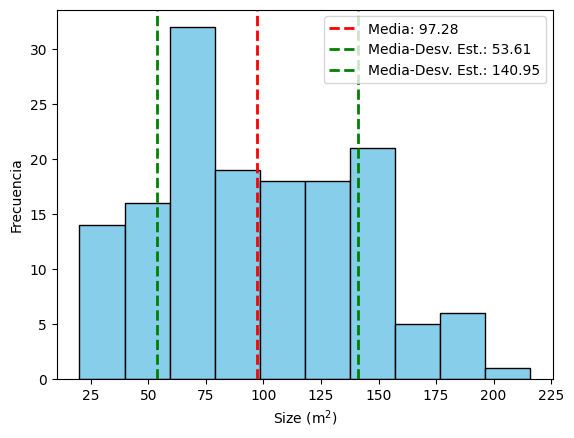

In [ ]:
mean_size = df["size"].mean()
std_size = df["size"].std()

df["size"].hist()

plt.hist(df["size"], color="skyblue", edgecolor="black")
plt.axvline(mean_size, color="red", linestyle="dashed", linewidth=2, label=f"Media: {mean_size:.2f}")
plt.axvline(mean_size - std_size, color="green", linestyle="dashed", linewidth=2, label=f"Media-Desv. Est.: {mean_size-std_size:.2f}")
plt.axvline(mean_size + std_size, color="green", linestyle="dashed", linewidth=2, label=f"Media-Desv. Est.: {mean_size+std_size:.2f}")
plt.xlabel("Size (m$^2$)")
plt.ylabel("Frecuencia")
plt.legend()
plt.grid(False)
plt.show()

### Apartado 1.2

Yo elegiría la variable location_index, pues se puede apreciar mejor que presenta una tendencia lineal que con la variable size, en la que los datos del scatter plot están más dispersos.

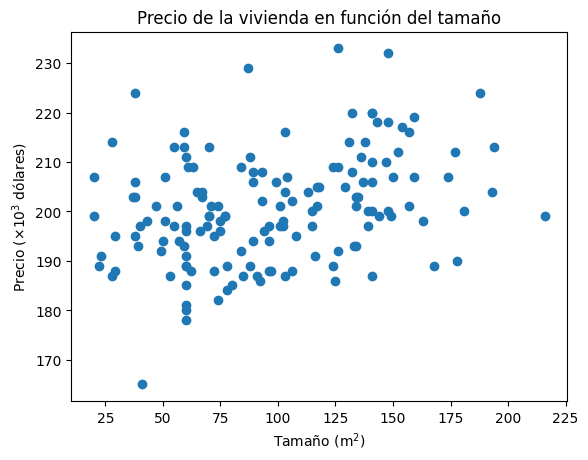

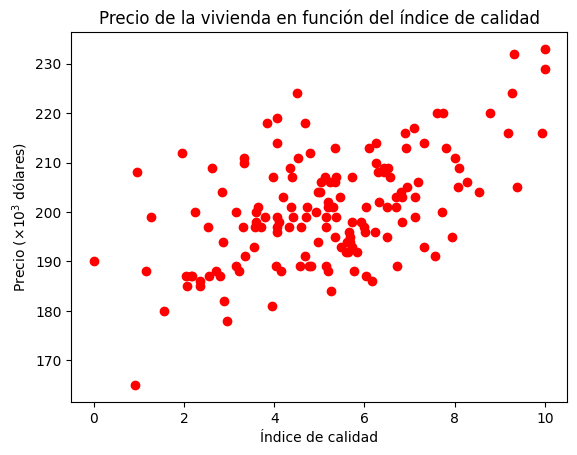

In [ ]:
plt.scatter(x=df["size"],y=df["price"])
plt.xlabel("Tamaño (m$^2$)")
plt.ylabel(r"Precio ($\times 10^3$ dólares)")
plt.title("Precio de la vivienda en función del tamaño")
plt.show()

plt.scatter(x=df["location_index"],y=df["price"], color="red")
plt.xlabel("Índice de calidad")
plt.ylabel(r"Precio ($\times 10^3$ dólares)")
plt.title("Precio de la vivienda en función del índice de calidad")
plt.show()

### Apartado 1.3

El test de Breusch-Pagan nos confirma que los residuos son homocedásticos. El test de Shapiro-Wilk nos confirma que la distribución de los residuos es normal y el test de Durbin-Watson nos confirma que no existe autocorrelación entre los errores, pues el valor del estadístico es cercano a 2. Respecto del test RESET de Ramsey, no podemos afirmar que el modelo se pueda explicar con combinaciones lineales de la variable, es decir, necesitamos introducir relaciones no lineales de la variable location_index

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(df["location_index"],df["price"], train_size=0.8, random_state=135)

X_train_unos, X_test_unos = sm.add_constant(X_train), sm.add_constant(X_test)

modelo = sm.OLS(Y_train, X_train_unos).fit()

residuos = modelo.resid

_, pv1_bp, _, pv2_bp = het_breuschpagan(residuos, X_train_unos)
print(f"P-valor del test de Breusch-Pagan: {pv1_bp} y {pv2_bp}")

p_valor_reset = linear_reset(modelo).pvalue
print(f"P-valor del test RESET de Ramsey: {p_valor_reset}")

_,p_valor_shapiro = shapiro(residuos)
print(f"P-valor Shapiro-Wilk: {p_valor_shapiro}")

estadistico_durbin_watson = durbin_watson(residuos)
print(f"Estadístico de Durbin-Watson: {estadistico_durbin_watson}")

modelo.summary()

P-valor del test de Breusch-Pagan: 0.5915932918470932 y 0.5952581862688073
P-valor del test RESET de Ramsey: 0.005220037289179166
P-valor Shapiro-Wilk: 0.47038136084651727
Estadístico de Durbin-Watson: 1.8102373919411727


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     52.61
Date:                Sun, 16 Nov 2025   Prob (F-statistic):           4.63e-11
Time:                        10:48:09   Log-Likelihood:                -436.86
No. Observations:                 120   AIC:                             877.7
Df Residuals:                     118   BIC:                             883.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            184.1266      2.420     76.074      0.000     179.334     188.919
location_index     3.1515      0.434      7.253      0.000       2.291       4.012
==============================================================================
Omnibus:                        1.900   Durbin-Watson:                   1.810
Prob(Omnibus):                  0.387   Jarque-Bera (JB):                1.753
Skew:                           0.192   Prob(JB):                        0.416
Kurtosis:                       2.550   Cond. No.                         16.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Apartado 1.4


Los p values obtenidos de los test de hipótesis nos permite confirmar de manera estadísticamente fiable que se cumplen los supuestos de la regresión lineal. Respecto del valor R$^2$, obtenemos unos valores de $\sim 0.8$, es decir, nuestro modelo explica aproxidamente un 80 $\%$ la variabilidad de los datos. Más allá de que sea un valor alto o no, sí es un valor confiable, pues en el modelo propuesto se verifican todos los supuestos de la regresión lineal

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(df.iloc[:,:-1], df["price"], train_size=0.8, random_state=135)

X_train_unos, X_test_unos = sm.add_constant(X_train), sm.add_constant(X_test)

modelo = sm.OLS(Y_train, X_train_unos).fit()

residuos = modelo.resid

_, pv1_bp, _, pv2_bp = het_breuschpagan(residuos, X_train_unos)
print(f"P-valor del test de Breusch-Pagan: {pv1_bp} y {pv2_bp}")

p_valor_reset = linear_reset(modelo).pvalue
print(f"P-valor del test RESET de Ramsey: {p_valor_reset}")

_,p_valor_shapiro = shapiro(residuos)
print(f"P-valor Shapiro-Wilk: {p_valor_shapiro}")

estadistico_durbin_watson = durbin_watson(residuos)
print(f"Estadístico de Durbin-Watson: {estadistico_durbin_watson}")

R2_adj_ent = modelo.rsquared_adj
R2_ent = modelo.rsquared
print(f"R2 ajustado durante el entrenamiento: {R2_adj_ent}")
print(f"R2 durante el entrenamiento: {R2_ent}")

Y_test_pred = modelo.predict(X_test_unos)
R2_test = r2_score(Y_test, Y_test_pred)
print(f"R2 durante el test {R2_test}")

P-valor del test de Breusch-Pagan: 0.500572969187157 y 0.5093018450453124
P-valor del test RESET de Ramsey: 0.6592435078467964
P-valor Shapiro-Wilk: 0.5065491211246331
Estadístico de Durbin-Watson: 1.7485095524024525
R2 ajustado durante el entrenamiento: 0.8194832737483875
R2 durante el entrenamiento: 0.8240341155866635
R2 durante el test 0.8958702348042662


## Regresión Logística

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.metrics import roc_curve, auc

### Apartado 2.1

In [ ]:
df=pd.read_csv("deteccion_cancer.csv")
numero_1 = df["Diagnosis"].value_counts()[1]
casos_totales = df["Diagnosis"].count()

prob_nevus = numero_1 / casos_totales

odd = prob_nevus / (1 - prob_nevus)

log_odd = np.log(odd)

print(f"La probabilidad de obtener un nevus maligno es: {prob_nevus:.4f}\nEl odd asociado es: {odd:.4f}\nEl log-odd asociado es: {log_odd:.4f}")

La probabilidad de obtener un nevus maligno es: 0.3726
El odd asociado es: 0.5938
El log-odd asociado es: -0.5211


### Apartado 2.2

La variable que mejor predice la posibilidad de tener cancer es el radio, ya que esta es la que tiene un gini más cercano a 1

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size=0.25, random_state=135)

modelo_1 = LogisticRegression()
modelo_1.fit(X_train[["radius"]], Y_train)
Y_prob_1 = modelo_1.predict_proba(X_test[["radius"]])[:,1]
fpr_1, tpr_1, _=roc_curve(Y_test, Y_prob_1)
roc_auc_1 = auc(fpr_1, tpr_1)
gini_1 = 2*roc_auc_1-1

modelo_2 = LogisticRegression()
modelo_2.fit(X_train[["texture"]], Y_train)
Y_prob_2 = modelo_2.predict_proba(X_test[["texture"]])[:,1]
fpr_2, tpr_2, _=roc_curve(Y_test, Y_prob_2)
roc_auc_2 = auc(fpr_2, tpr_2)
gini_2 = 2*roc_auc_2-1

modelo_3 = LogisticRegression()
modelo_3.fit(X_train[["concavity"]], Y_train)
Y_prob_3 = modelo_3.predict_proba(X_test[["concavity"]])[:,1]
fpr_3, tpr_3, _=roc_curve(Y_test, Y_prob_3)
roc_auc_3 = auc(fpr_3, tpr_3)
gini_3 = 2*roc_auc_3-1

print(f"La métrica gini para el modelo 1 es: {gini_1:.3f}")
print(f"La métrica gini para el modelo 2 es: {gini_2:.3f}")
print(f"La métrica gini para el modelo 3 es: {gini_3:.3f}")

La métrica gini para el modelo 1 es: 0.914
La métrica gini para el modelo 2 es: 0.564
La métrica gini para el modelo 3 es: 0.899


### Apartado 2.3

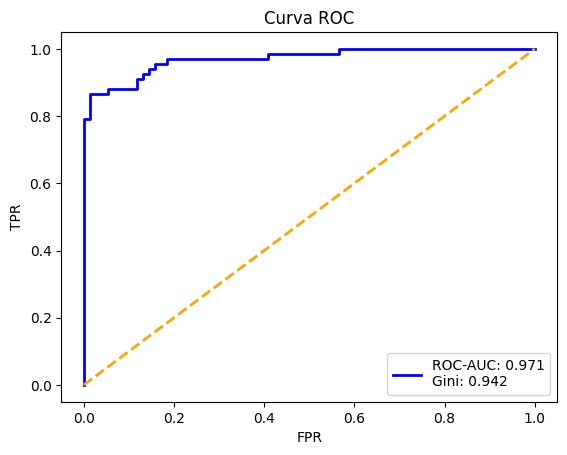

--------Comparación de la métrica gini de la regresión entera con respecto a las regresiones individuales--------
gini_entera - gini_1 = 0.027690494893951367
gini_entera - gini_2 = 0.37824037706205793
gini_entera - gini_3 = 0.04261586802827955


In [ ]:
modelo = LogisticRegression()
modelo.fit(X_train, Y_train)
Y_prob = modelo.predict_proba(X_test)[:,1]

fpr, tpr, _ = roc_curve(Y_test,Y_prob, pos_label=1)
roc_auc = auc(fpr, tpr)
gini = 2*roc_auc - 1

plt.plot(fpr, tpr, c="blue", lw=2, label=f"ROC-AUC: {roc_auc:.3f}\nGini: {gini:.3f}")
plt.plot([0,1], [0,1], c="orange", linestyle="--", lw=2)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Curva ROC")
plt.legend()
plt.show()
print("--------Comparación de la métrica gini de la regresión entera con respecto a las regresiones individuales--------")
print(f"gini_entera - gini_1 = {gini-gini_1}")
print(f"gini_entera - gini_2 = {gini-gini_2}")
print(f"gini_entera - gini_3 = {gini-gini_3}")

### Apartado 2.4

En teoría, lo ideal sería tener un excelente recall y una excelente precisión pero esto se aleja de la realidad. Si tengo que elegir qué priorizar, yo escogería el recall porque es peor un paciente que tiene un cáncer y que nuestro modelo no ha sido capaz de detectar que un paciente que no tiene cáncer y se le ha detectado cáncer.

## Random Forest

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, precision_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns